# Baseline Model:
This notebook evaluates a baseline model for predicting job titles based on the dataset. The baseline model always predicts the majority class observed in the training data.

The process involves:


*   Loading, implements Dataset abstract class of PyTorch and preprocessing the data using the

*   Training the baseline model on the training set labels to identify the majority class.

*   Using the trained model to predict job titles for the test set.

* Evaluating the model's performance using appropriate metrics.

# Imports
Import required dependencies

In [387]:
from torch.utils.hipify.hipify_python import preprocessor
# !pip install import-ipynb
# !pip install --upgrade pip
# !pip install nbimporter


In [388]:
from collections import Counter
import matplotlib.pyplot as plt
import nbimporter
import Dataset_Preprocessor as dp
import numpy as np
import import_ipynb
import importlib
import pandas as pd
# from Dataset_Preprocessor import DataPreprocessor
importlib.reload(Dataset_Preprocessor)
import tensorflow as tf
from tensorflow import summary




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tzoharlary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleSpec(name='Dataset_Preprocessor', loader=<import_ipynb.NotebookLoader object at 0x125408d10>, origin='Dataset_Preprocessor.ipynb')

# Load the dataset


In [389]:
preprocessor = dp.DataPreprocessor(csv_path="../../data/Job Prediction By Resume.csv")

df = preprocessor.data

df.head()

,Name,Gender,Course in UG,UG specialization? Major Subject (Eg; Mathematics),Interests,Skills,Average CGPA or Percentage obtained in under graduation,Certificate course title,Work in the past,First Job title in your current field of work,title job,Match Percentage
0,A.Uha Priya,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,85,"Linux,Git",Yes,Software,Software Developer (Female Leader),58
1,Aadil,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",66.5,Microsoft certification,Yes,Computer Software Engineer,IT Specialist,57
2,Aakriti,Female,BA,Psychology,Understand human behaviour,People management;Communication skills,64.6,Resilience psychology,No,NaN,Clinical Psychologist,70
3,Aanchal sharma,Female,MBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,75.525,No,Yes,Relationships manager,Marketing Strategist,100
4,Aangkeeta Sarkar,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,70.68,Extreme Productivity (Blinkist Summary),Yes,Plant Instrumentation Engineer,IT Specialist,91


In [390]:
df.shape

(20000, 12)

# Preprocessing the data


Clean the column names:
* Remove leading and trailing spaces.
* Remove any text within parentheses.
* Replace any non-word characters with underscores.
* Replace any whitespace with underscores.
* Convert all characters to lowercase.


In [391]:
# check before and after cleaning the column names, first show how the columns names are and then show how they are after cleaning
print("Original column names:", df.columns.tolist())
preprocessor.clean_column_names()
print("\nCleaned column names:", df.columns.tolist())



Original column names: ['Name', 'Gender', 'Course in UG', ' UG specialization? Major Subject (Eg; Mathematics)', 'Interests', 'Skills', 'Average CGPA or Percentage obtained in under graduation', 'Certificate course title', 'Work in the past', 'First Job title in your current field of work ', 'title job', 'Match Percentage']

Cleaned column names: ['name', 'gender', 'course_in_ug', 'ug_specialization__major_subject', 'interests', 'skills', 'average_cgpa_or_percentage_obtained_in_under_graduation', 'certificate_course_title', 'work_in_the_past', 'first_job_title_in_your_current_field_of_work', 'title_job', 'match_percentage']


Handle missing values:
* Fill missing values in the 'skills' column with 'No'
* Fill missing values in the 'first_job_title_in_your_current_field_of_work' column with 'Unemployed'
* Fill missing values in the 'certificate_course_title' column with 'No'

Handle multivalue cells:
* Process multi-value cells in string columns by splitting values separated by `;` into lists.
* Replace missing or `NaN` values in these columns with empty lists (`[]`).
* Leave non-empty cells without `;` as single strings.

Verify no missing values are present in the dataset.

In [392]:
preprocessor.handle_missing_values("skills", "No")
preprocessor.handle_missing_values("first_job_title_in_your_current_field_of_work", "Unemployed")
preprocessor.handle_missing_values("certificate_course_title", "No")

preprocessor.handle_multivalued_cells()

# Check for missing values in the dataset
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Missing values found in the dataset: {missing_values}")



No missing values found in the dataset.


Define the Tag:
* Drop rows with missing values in the 'Tag_column'.
* Assign the 'Tag_column' as the target variable.
* Assign the remaining columns as the features.
* Convert the target variable to categorical codes.
* Create a mapping of the target variable categories.
* Set the number of tags and features.

In [393]:
print("Original columns:", df.columns.tolist())
preprocessor.define_label("title_job")
print(f"Tag column: {preprocessor.Tag_column}")


Original columns: ['name', 'gender', 'course_in_ug', 'ug_specialization__major_subject', 'interests', 'skills', 'average_cgpa_or_percentage_obtained_in_under_graduation', 'certificate_course_title', 'work_in_the_past', 'first_job_title_in_your_current_field_of_work', 'title_job', 'match_percentage']
hey you
Tag column: title_job


### Displaying Tags Mapping
This section of the code performs the following tasks:
**Tags Mapping Table**:
   * Creates a DataFrame from the `Tags_mapping` dictionary, which maps tag codes to their respective tags.
   * Displays this mapping in a table format using Matplotlib.

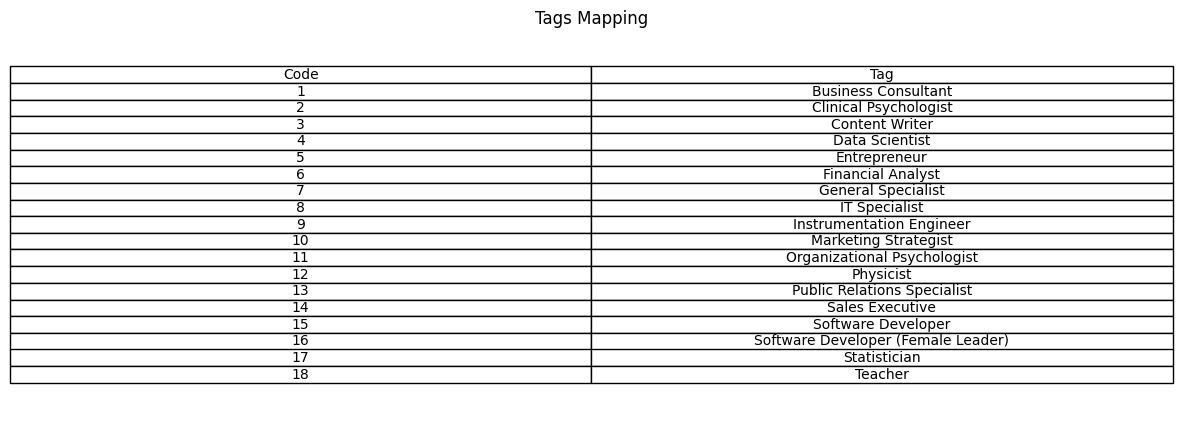

In [394]:
# showing table form the mapping of the tags, and near that table of y.head() and X.head() using matlibplot:
tags_mapping_df = pd.DataFrame(list(preprocessor.Tags_mapping.items()), columns=['Code', 'Tag'])

# Check if the DataFrame is empty
if tags_mapping_df.empty:
    print("The tags mapping DataFrame is empty.")
else:
    # Create a figure with one subplot
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    # Plot the tags mapping
    ax.axis('off')
    ax.table(cellText=tags_mapping_df.values, colLabels=tags_mapping_df.columns, cellLoc='center', loc='center')
    ax.set_title('Tags Mapping')

    plt.show()

## Preprocess the dataset:
* For each column in the dataset:
* If the column contains object data type or any string values:
* Print the count of each value type in the column.
* Tokenize the text values in the column.
* Pad the tokenized text sequences.
* Replace the original column values with the padded sequences.


In [395]:

preprocessor.preprocess_dataset()


Display every column's the number of elements in each row.

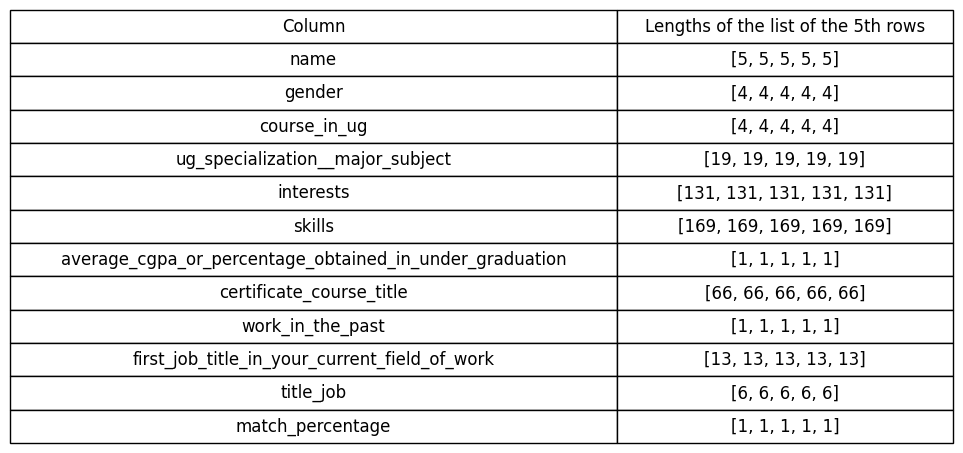

In [396]:
# Ensure df is updated with the preprocessed data
df = preprocessor.data.copy()

# Display the lengths of the list of the 5th rows in each column
lengths_summary = {
    "Column": [],
    "Lengths of the list of the 5th rows": []
}
for column in df.columns:
    # Make sure all values are lists or convert them to empty lists if not
    lengths = [len(row) if isinstance(row, list) else 0 for row in df[column].head(5)]
    lengths_summary["Column"].append(column)
    lengths_summary["Lengths of the list of the 5th rows"].append(lengths)

# Create a DataFrame with the summary
lengths_df = pd.DataFrame(lengths_summary)

# Create a plot to display the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  # Turn off the axis

# Add the table to the plot
table = plt.table(
    cellText=lengths_df.values,
    colLabels=lengths_df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_row_height = False
table.scale(1, 2)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(lengths_df.columns))))

plt.show()

Split the data:
* Shuffle the dataset indices with a given random seed.
* Split the dataset into training, validation, and test sets based on the specified fractions.
* Assign the respective splits to `self.train_dataset`, `self.val_dataset`, and `self.test_dataset`.

In [397]:
preprocessor.split_data()



In [398]:
train_dataset = preprocessor.get_datasets("train")
val_dataset = preprocessor.get_datasets("val")
test_dataset = preprocessor.get_datasets("test")

print("Train dataset shape:", train_dataset.shape)
print("Validation dataset shape:", val_dataset.shape)
print("Test dataset shape:", test_dataset.shape)

train_tags = train_dataset[preprocessor.Tag_column]
print("Train tags shape:", train_tags.head())

print(preprocessor.Tags_mapping)

Train dataset shape: (14000, 12)
Validation dataset shape: (3000, 12)
Test dataset shape: (3000, 12)
Train tags shape: 10650      [5, 1, 0, 0, 0, 0]
2041       [3, 4, 6, 7, 8, 9]
8668       [3, 4, 0, 0, 0, 0]
1114       [5, 1, 0, 0, 0, 0]
13902    [10, 11, 0, 0, 0, 0]
Name: title_job, dtype: object
{1: 'Business Consultant', 2: 'Clinical Psychologist', 3: 'Content Writer', 4: 'Data Scientist', 5: 'Entrepreneur', 6: 'Financial Analyst', 7: 'General Specialist', 8: 'IT Specialist', 9: 'Instrumentation Engineer', 10: 'Marketing Strategist', 11: 'Organizational Psychologist', 12: 'Physicist', 13: 'Public Relations Specialist', 14: 'Sales Executive', 15: 'Software Developer', 16: 'Software Developer (Female Leader)', 17: 'Statistician', 18: 'Teacher'}


Display the distribution of tags in the training, validation, and test sets.

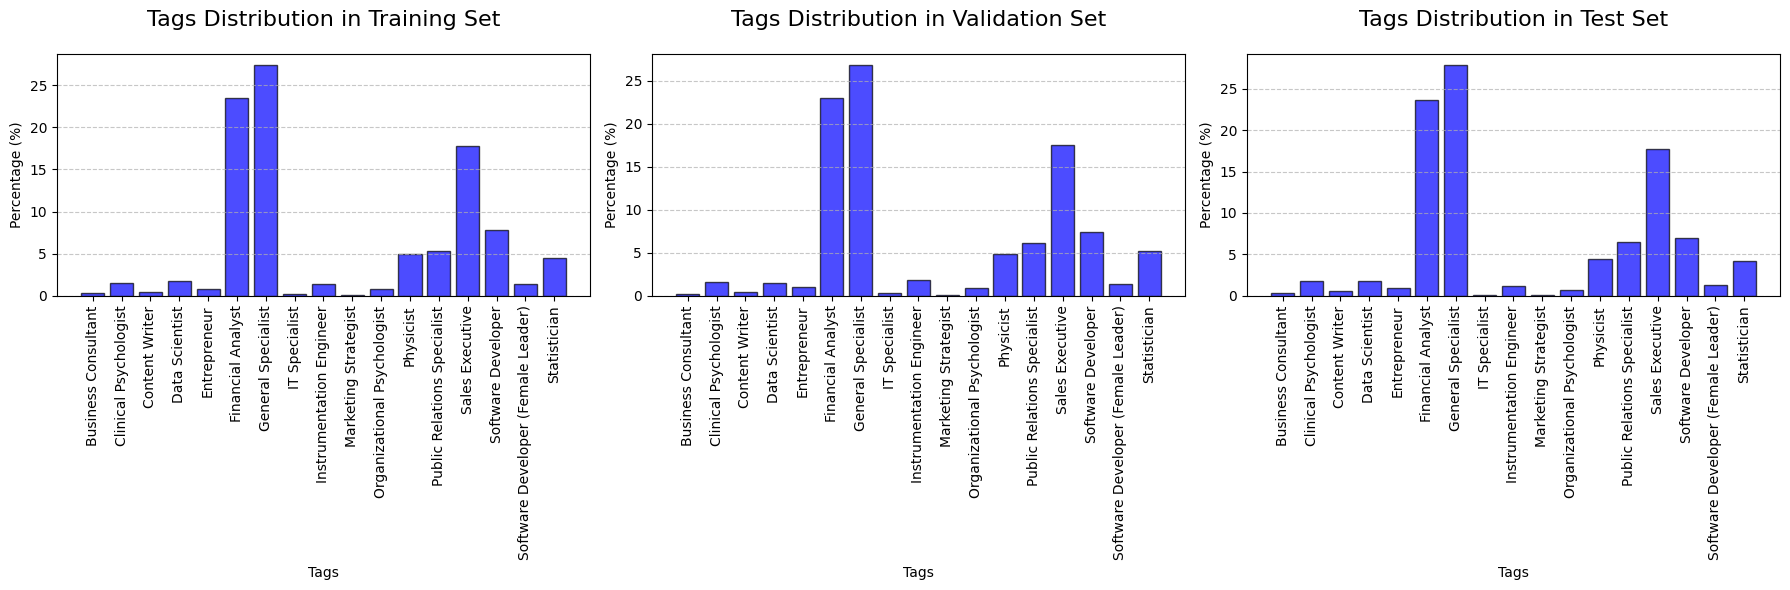

In [399]:
# Get the tags distribution in the training, validation, and test sets
train_indices = preprocessor.train_dataset.index
val_indices = preprocessor.val_dataset.index
test_indices = preprocessor.test_dataset.index

train_tags = preprocessor.y.loc[train_indices]
val_tags = preprocessor.y.loc[val_indices]
test_tags = preprocessor.y.loc[test_indices]



# Function to plot the tags distribution in percentages
def plot_tags_distribution(ax, tags, title):
    # Filter out the padding value (0)
    tags = tags[tags != 0]

    # Count the occurrences of each tag
    tag_counts = tags.value_counts().sort_index()

    # Calculate the percentages
    tag_percentages = (tag_counts / tag_counts.sum()) * 100

    # Create the plot
    ax.bar(tag_percentages.index, tag_percentages.values, color='blue', alpha=0.7, edgecolor='black')
    ax.set_xticks(tag_percentages.index)
    ax.set_xticklabels([tags_mapping.get(k, 'Unknown') for k in tag_percentages.index], rotation=90)
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel('Tags')
    ax.set_ylabel('Percentage (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the tags distribution for training, validation, and test sets
plot_tags_distribution(axs[0], train_tags, 'Tags Distribution in Training Set')
plot_tags_distribution(axs[1], val_tags, 'Tags Distribution in Validation Set')
plot_tags_distribution(axs[2], test_tags, 'Tags Distribution in Test Set')

plt.tight_layout()
plt.show()

# Predict the majority class

In [414]:
# find in the train tags the most common tag, then extract the majority class from the Category_mapping.
Category_mapping = preprocessor.Tags_mapping
most_common_tag = train_tags.value_counts().idxmax()
majority_class = Category_mapping[most_common_tag + 1]
print(f"The majority class is {majority_class}")

# Predict the majority class for the test labels
Baseline_pred = [most_common_tag] * len(test_tags)
print(Baseline_pred[:10])

The majority class is IT Specialist
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


# Calculate Metrics
* compute the accuracy, precision, recall, and F1-score of the baseline model.
* visualize the results.

Accuracy:

In [415]:
accuracy = np.sum(np.array(test_tags) == np.array(Baseline_pred)) / len(test_tags)
# Log the metric to TensorBoard if a writer is provided
writer = None  # Replace with your TensorBoard writer if available
step = 0  # Replace with the current step if needed
if writer:
    with writer.as_default():
        tf.summary.scalar("accuracy", accuracy, step=step)
# Print the accuracy
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage}%")

Accuracy: 27.46666666666667%


Recall:

In [416]:
unique_labels, counts = np.unique(test_tags, return_counts=True)
weights = counts / len(test_tags)
recalls = []
for label in unique_labels:
    tp = np.sum((np.array(Baseline_pred) == label) & (np.array(test_tags) == label))
    fn = np.sum((np.array(Baseline_pred) != label) & (np.array(test_tags) == label))
    recalls.append(tp / (tp + fn) if tp + fn > 0 else 0)
recall = np.sum(np.array(recalls) * weights)

# Log the metric to TensorBoard if a writer is provided
writer = None  # Replace with your TensorBoard writer if available
step = 0  # Replace with the current step if needed
if writer:
    with writer.as_default():
        tf.summary.scalar("recall", recall, step=step)

# Print the recall
recall_percentage = recall * 100
print(f"Recall: {recall_percentage}%")

Recall: 27.46666666666667%


Precision:

In [417]:
# Calculate precision for the given true labels and predictions
unique_labels, counts = np.unique(test_tags, return_counts=True)
weights = counts / len(test_tags)
precisions = []
for label in unique_labels:
    tp = np.sum((np.array(Baseline_pred) == label) & (np.array(test_tags) == label))
    fp = np.sum((np.array(Baseline_pred) == label) & (np.array(test_tags) != label))
    precisions.append(tp / (tp + fp) if tp + fp > 0 else 0)
precision = np.sum(np.array(precisions) * weights)

# Log the metric to TensorBoard if a writer is provided
writer = None  # Replace with your TensorBoard writer if available
step = 0  # Replace with the current step if needed
if writer:
    with writer.as_default():
        tf.summary.scalar("precision", precision, step=step)

# Print the precision
precision_percentage = precision * 100
print(f"Precision: {precision_percentage}%")




Precision: 7.544177777777778%


F1-Score:

In [418]:
unique_labels, counts = np.unique(test_tags, return_counts=True)
weights = counts / len(test_tags)
f1_scores = []
for label in unique_labels:
    tp = np.sum((np.array(Baseline_pred) == label) & (np.array(test_tags) == label))
    fp = np.sum((np.array(Baseline_pred) == label) & (np.array(test_tags) != label))
    fn = np.sum((np.array(Baseline_pred) != label) & (np.array(test_tags) == label))
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_scores.append(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0)
f1_score = np.sum(np.array(f1_scores) * weights)

# Log the metric to TensorBoard if a writer is provided
writer = None  # Replace with your TensorBoard writer if available
step = 0  # Replace with the current step if needed
if writer:
    with writer.as_default():
        tf.summary.scalar("f1_score", f1_score, step=step)

# Print the F1-score
print(f"F1-score: {f1_score}")

F1-score: 0.11837099023709903


Visualize the Model Predictions:

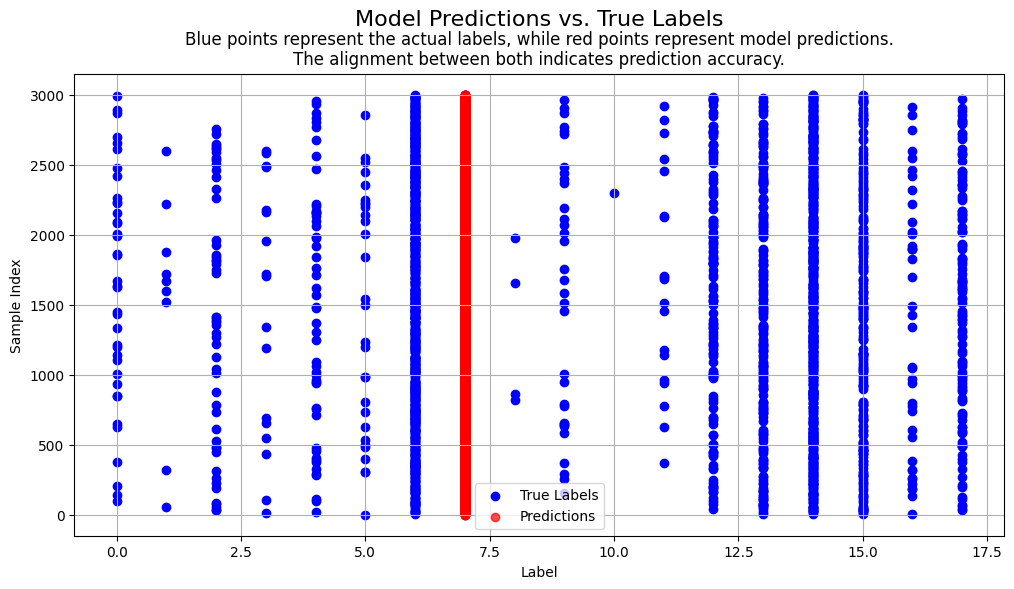

In [421]:
plt.figure(figsize=(12, 6))
plt.scatter(test_tags, range(len(test_tags)), label="True Labels", color='blue')
plt.scatter(Baseline_pred, range(len(Baseline_pred)), label="Predictions", color='red', alpha=0.7)
plt.ylabel("Sample Index")
plt.xlabel("Label")
plt.xticks(fontsize=10)
plt.legend()
plt.grid(True)
plt.title("Model Predictions vs. True Labels", fontsize=16, pad=35)
plt.figtext(0.5, 1.02,
            "Blue points represent the actual labels, while red points represent model predictions.\nThe alignment between both indicates prediction accuracy.",
            fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.show()